

## Retrieve data

First, let's get our info

In [36]:
!pip install pandas numpy sqlalchemy requests tqdm matplotlib geopandas shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 12.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.7 MB/s eta 0:00:0031m11.0 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!rm -rf data
!rm cyclistic.db
!mkdir -p data

In [32]:
# Download Parameters
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import sqlite3
import zipfile
from pathlib import Path
from tqdm import tqdm

download_url = "https://divvy-tripdata.s3.amazonaws.com/"
download_files = [
    "202307-divvy-tripdata.zip",
    "202308-divvy-tripdata.zip",
    "202309-divvy-tripdata.zip",
    "202310-divvy-tripdata.zip",
    "202311-divvy-tripdata.zip",
    "202312-divvy-tripdata.zip",
    "202401-divvy-tripdata.zip",
    "202402-divvy-tripdata.zip",
    "202403-divvy-tripdata.zip",
    "202404-divvy-tripdata.zip",
    "202405-divvy-tripdata.zip",
    "202406-divvy-tripdata.zip"
]
working_directory = "./data/"
db_url = "cyclistic.db"

Now that we have the data downloaded, let's put it into a SQLITE db for easier manipulation.

In [8]:
def unzip(filename):
    """Unzips a zip file and displays a progress bar."""
    with zipfile.ZipFile(filename, "r") as zip_ref:
        total_size = sum((info.file_size for info in zip_ref.infolist()))

        with zipfile.ZipFile(filename, "r") as zip_ref:
            with tqdm(
                desc=filename,
                total=total_size,
                unit="iB",
                unit_scale=True,
                unit_divisor=1024,
            ) as bar:
                for info in zip_ref.infolist():
                    zip_ref.extract(info, path=os.path.dirname(filename))

def download_zip(url, filename):
    """Downloads a zip file from the given URL and displays a progress bar."""
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    total_size = int(response.headers.get("content-length", 0))
    with open(filename, "wb") as f, tqdm(
        desc=filename,
        total=total_size,
        unit="iB",
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
            bar.update(len(chunk))

conn = sqlite3.connect(db_url)
for file in download_files:
    download_zip(download_url + file, working_directory + file)
    unzip(working_directory + file)
    os.remove(working_directory + file)
    pd.read_csv(
        working_directory + file.replace(".zip", ".csv")).to_sql(
            "cyclistic", conn, if_exists="append")

./data/202307-divvy-tripdata.zip: 100%|██████████| 27.2M/27.2M [00:05<00:00, 5.68MiB/s]
./data/202307-divvy-tripdata.zip:   0%|          | 0.00/147M [00:00<?, ?iB/s]
./data/202308-divvy-tripdata.zip: 100%|██████████| 27.3M/27.3M [00:06<00:00, 4.21MiB/s]
./data/202308-divvy-tripdata.zip:   0%|          | 0.00/148M [00:00<?, ?iB/s]
./data/202309-divvy-tripdata.zip: 100%|██████████| 23.7M/23.7M [00:02<00:00, 10.2MiB/s]
./data/202309-divvy-tripdata.zip:   0%|          | 0.00/128M [00:00<?, ?iB/s]
./data/202310-divvy-tripdata.zip: 100%|██████████| 18.3M/18.3M [00:05<00:00, 3.61MiB/s]
./data/202310-divvy-tripdata.zip:   0%|          | 0.00/103M [00:00<?, ?iB/s]
./data/202311-divvy-tripdata.zip: 100%|██████████| 12.6M/12.6M [00:03<00:00, 3.81MiB/s]
./data/202311-divvy-tripdata.zip:   0%|          | 0.00/69.6M [00:00<?, ?iB/s]
./data/202312-divvy-tripdata.zip: 100%|██████████| 8.03M/8.03M [00:02<00:00, 4.12MiB/s]
./data/202312-divvy-tripdata.zip:   0%|          | 0.00/42.9M [00:00<?, ?iB/s]
./

Now that we have everything downloaded, we are going to read the dataframe from cyclistic table in cyclistic db.

In [6]:
conn = sqlite3.connect(db_url)
df = pd.read_sql("SELECT * FROM cyclistic", conn)
conn.close()
df

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734376,710716,1D1EBE57758FB1EE,electric_bike,2024-06-11 08:25:42.325,2024-06-11 08:33:43.928,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968466,-87.674225,41.961524,-87.691177,member
5734377,710717,2F63E9CD01D79515,electric_bike,2024-06-24 11:40:44.516,2024-06-24 11:42:09.949,Damen Ave & Leland Ave,TA1307000158,None,None,41.967121,-87.679127,41.970000,-87.670000,member
5734378,710718,97D225818F9C7AC3,electric_bike,2024-06-30 10:43:32.975,2024-06-30 10:45:45.087,Damen Ave & Leland Ave,TA1307000158,None,None,41.967154,-87.679091,41.970000,-87.680000,member
5734379,710719,C8D2A48B901F7399,electric_bike,2024-06-11 18:20:40.861,2024-06-11 18:29:04.920,Pine Grove Ave & Irving Park Rd,TA1308000022,None,None,41.954404,-87.647983,41.930000,-87.640000,member


In [22]:
df.dropna()
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26


Now, let's dig in. What should we look at first? Let's look at the relationship of casual users vs member users and what type of bike they use.

In [10]:
manual_casual_bike = df[['member_casual', 'rideable_type']].value_counts()
manual_casual_bike

member_casual  rideable_type
member         classic_bike     1889448
               electric_bike    1795547
casual         electric_bike    1050559
               classic_bike      964446
               docked_bike        34381
Name: count, dtype: int64

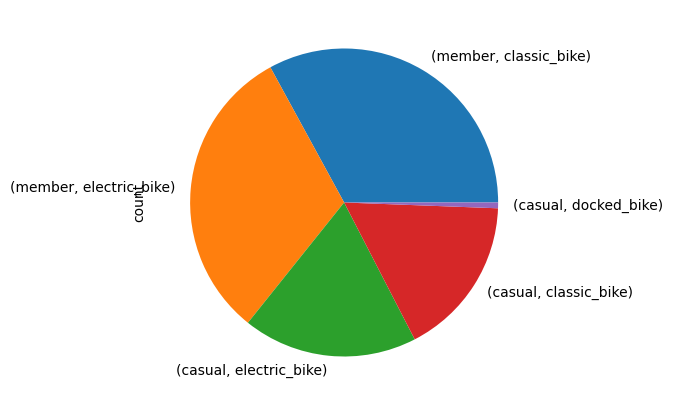

In [11]:

plot = manual_casual_bike.plot.pie(subplots=True, figsize=(5, 5))

In [23]:
# calculate the length of ride and add it to DF
df['ride_length'] = df['ended_at'] - df['started_at']
df.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26


In [28]:
casual_mean = df.where(df.member_casual == 'casual').ride_length.mean()
member_mean = df.where(df.member_casual == 'member').ride_length.mean()
print(f'casual mean is {casual_mean}')
print(f'member mean is {member_mean}')

delta_mean = casual_mean - member_mean
print(f'delta mean is {delta_mean}')

casual mean is 0 days 00:27:57.016861346
member mean is 0 days 00:12:52.183944805
delta mean is 0 days 00:15:04.832916541


Our observation shows that casual users have longer ride lengths than member users.

In [40]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd


def calculate_distances_geopandas(start_lat, start_long, end_lat, end_long):
    """
    Calculates the distances between pairs of start and end coordinates using GeoPandas.

    Args:
        start_lat (pd.Series): A Series containing start latitudes.
        start_long (pd.Series): A Series containing start longitudes.
        end_lat (pd.Series): A Series containing end latitudes.
        end_long (pd.Series): A Series containing end longitudes.

    Returns:
        pd.Series: A Series containing the distances between corresponding start-end coordinate pairs in kilometers.
    """

    # Input validation (same length for all series)
    if not len({len(start_lat), len(start_long), len(end_lat), len(end_long)}) == 1:
        raise ValueError("All input Series must have the same length.")

    # Create Point geometries from start and end coordinates
    start_points = gpd.GeoSeries(
        [Point(lon, lat) for lat, lon in zip(start_lat, start_long)], crs="EPSG:4326")
    end_points = gpd.GeoSeries(
        [Point(lon, lat) for lat, lon in zip(end_lat, end_long)], crs="EPSG:4326")

    # Calculate distances (in meters) and convert to kilometers
    distance = start_points.distance(end_points, align=True)

    return distance

In [41]:
df['distance'] = calculate_distances_geopandas(
    df['start_lat'],
    df['start_lng'],
    df['end_lat'],
    df['end_lng']
)
df.head()

/var/folders/0z/s8q5j9sj52s90llyhn7nhj5m0000gn/T/ipykernel_4160/3139552617.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  meters = start_points.distance(end_points)


,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,distance
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,0.047926
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,0.038819
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,0.014135
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,0.015812
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,0.029275


Now to find the mean distance between casual users and member users.

In [43]:
casual_mean = df.where(df.member_casual == 'casual').distance.mean()
member_mean = df.where(df.member_casual == 'member').distance.mean()
print(f'casual distance mean is {casual_mean}')
print(f'member distance mean is {member_mean}')

delta_mean = abs(casual_mean - member_mean)
print(f'delta mean is {delta_mean}')

casual distance mean is 0.02139933549653344
member distance mean is 0.021676717568822047
delta mean is 0.0002773820722886053


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>)

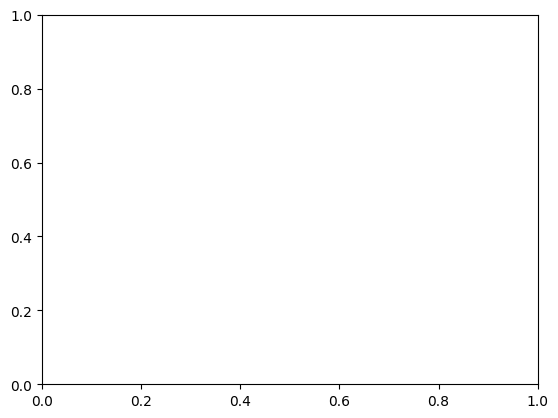

In [44]:
# Create a scatterplot showing ride time to ride length
df.plot.scatter(x='ride_length', y='distance')